In [167]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Set the figure size.
sns.set(rc={'figure.figsize':(12, 8)})

# Set the plot style as white.
sns.set_style('white')

In [2]:
# Using Excel: create copy of Spend column: Spend_new. many of Spend_new values are times or dates. 
# So I changed data type of Spend2 column into number. But that still leaves 402 rows with timestamp data

In [234]:
# Import modified dataset
df_creative = pd.read_excel('Change 2022 Creative Data writeback_091122_altered.xlsx')
df_creative

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.1
102064,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.17
102065,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.14
102066,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.58


In [235]:
# Confirm data type of Spend2 is float. Also check for null values.
print(df_creative.shape)
print(df_creative.dtypes)
print(df_creative.info())

(102068, 22)
Requested URL Path                 object
Campaign                           object
Ad Format                          object
Clicks                            float64
Spend                              object
Creative - Size                    object
Date                       datetime64[ns]
Impressions                         int64
Reach                             float64
Audience                           object
Platform                           object
Creative - Family                  object
Creative - Version                 object
100% Video Views                  float64
Video Starts                      float64
Follows                           float64
Days away from max date             int64
Latest report?                      int64
CTR                               float64
CTR Score                         float64
Weighted CTR Score                float64
Spend_new                          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [236]:
# Make a copy of the dataframe before cleaning
df = df_creative.copy()
df

,Requested URL Path,Campaign,Ad Format,Clicks,Spend,Creative - Size,Date,Impressions,Reach,Audience,...,Creative - Version,100% Video Views,Video Starts,Follows,Days away from max date,Latest report?,CTR,CTR Score,Weighted CTR Score,Spend_new
0,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.26,NaN,2022-05-19,119,63.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.26
1,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.15,NaN,2022-05-19,9,8.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.15
2,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.38,NaN,2022-05-19,26,17.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.38
3,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,0.0,0.19,NaN,2022-05-19,12,10.0,1,...,NoDTI,NaN,NaN,NaN,165,0,0.000000,NaN,NaN,0.19
4,https://graph.facebook.com/v12.0/act_109970164...,FY22,Single image,1.0,3.62,NaN,2022-05-19,247,150.0,1,...,EarlyBird,NaN,NaN,NaN,165,0,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,NaN,ESPN,TV,NaN,0.1,NaN,2022-05-01,3,3.0,General Targetting,...,15s,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.1
102064,NaN,MTV,TV,NaN,0.17,NaN,2022-05-01,5,5.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.17
102065,NaN,Food Network,TV,NaN,0.14,NaN,2022-05-01,4,4.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.14
102066,NaN,Nat Geo TV,TV,NaN,0.58,NaN,2022-05-01,17,16.0,General Targetting,...,15_QR,NaN,NaN,NaN,183,0,NaN,NaN,NaN,0.58


In [237]:
# Drop unnecessary columns : 'Requested URL Path', 'Spend', 'Days away from max date', 'Latest report?'
df.drop(['Requested URL Path', 'Spend', 'Days away from max date', 'Latest report?'], axis = 1, inplace=True)

# View the dataframe
df

,Campaign,Ad Format,Clicks,Creative - Size,Date,Impressions,Reach,Audience,Platform,Creative - Family,Creative - Version,100% Video Views,Video Starts,Follows,CTR,CTR Score,Weighted CTR Score,Spend_new
0,FY22,Single image,0.0,NaN,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.26
1,FY22,Single image,0.0,NaN,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.15
2,FY22,Single image,0.0,NaN,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.38
3,FY22,Single image,0.0,NaN,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.19
4,FY22,Single image,1.0,NaN,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,NaN,NaN,NaN,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,NaN,NaN,2022-05-01,3,3.0,General Targetting,OTT,CloserTwins,15s,NaN,NaN,NaN,NaN,NaN,NaN,0.1
102064,MTV,TV,NaN,NaN,2022-05-01,5,5.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.17
102065,Food Network,TV,NaN,NaN,2022-05-01,4,4.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.14
102066,Nat Geo TV,TV,NaN,NaN,2022-05-01,17,16.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.58


In [238]:
# Rename columns

df.rename({'Ad Format' : 'Ad_Format',
           'Creative - Family': 'Creative_Family',
           'Creative - Version': 'Creative_Version',
           '100% Video Views': '100%_Video_Views',
           'Video Starts': 'Video_Starts',
           'CTR Score': 'CTR_Score', 'Weighted CTR Score':'Weighted_CTR_Score',
           'Spend_new' : 'Spend'}, axis=1, inplace=True)

In [239]:
# Change datatype of 'Spend' to float
df['Spend'] = pd.to_numeric(df['Spend'], errors='coerce')
df['Spend'].dtype

dtype('float64')

In [240]:
print(df['Spend'].isnull().sum())

# Drop the rows with na in 'Spend'
df.dropna(subset=['Spend'], inplace=True)

402


In [241]:
df

,Campaign,Ad_Format,Clicks,Creative - Size,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
0,FY22,Single image,0.0,NaN,2022-05-19,119,63.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.26
1,FY22,Single image,0.0,NaN,2022-05-19,9,8.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.15
2,FY22,Single image,0.0,NaN,2022-05-19,26,17.0,1,Facebook,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.38
3,FY22,Single image,0.0,NaN,2022-05-19,12,10.0,1,Instagram,CloseFaster,NoDTI,NaN,NaN,NaN,0.000000,NaN,NaN,0.19
4,FY22,Single image,1.0,NaN,2022-05-19,247,150.0,1,Facebook,CloserTwins,EarlyBird,NaN,NaN,NaN,0.004049,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,NaN,NaN,2022-05-01,3,3.0,General Targetting,OTT,CloserTwins,15s,NaN,NaN,NaN,NaN,NaN,NaN,0.10
102064,MTV,TV,NaN,NaN,2022-05-01,5,5.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.17
102065,Food Network,TV,NaN,NaN,2022-05-01,4,4.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.14
102066,Nat Geo TV,TV,NaN,NaN,2022-05-01,17,16.0,General Targetting,OTT,CloserTwins,15_QR,NaN,NaN,NaN,NaN,NaN,NaN,0.58


In [242]:
df.drop(['Creative - Size'], axis=1, inplace =True)

In [243]:
# Determine the number of missing values
df.isnull().sum()

Campaign                 72
Ad_Format                71
Clicks                11877
Date                      0
Impressions               0
Reach                 21237
Audience                 41
Platform                  0
Creative_Family         883
Creative_Version        525
100%_Video_Views      77230
Video_Starts          76217
Follows               93266
CTR                   12829
CTR_Score             27050
Weighted_CTR_Score    27050
Spend                     0
dtype: int64

In [244]:
# Percentage of missing values in each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

Follows               91.737651
100%_Video_Views      75.964433
Video_Starts          74.968033
Weighted_CTR_Score    26.606732
CTR_Score             26.606732
Reach                 20.888989
CTR                   12.618771
Clicks                11.682372
Creative_Family        0.868530
Creative_Version       0.516397
Campaign               0.070820
Ad_Format              0.069837
Audience               0.040328
Platform               0.000000
Impressions            0.000000
Date                   0.000000
Spend                  0.000000
dtype: float64

In [245]:
len(df['Clicks'].loc[df['Platform']=='OTT'])

11877

In [246]:
df['Clicks'].isna().sum()

11877

In [247]:
# Use fillna() to replace NaN with 0 for 'Clicks', 'Reach','100%_Video_Views','Video_Starts', 'Follows', 'CTR',
# 'CTR_Score', 'Weighted_CTR_Score'
#df[['Clicks', 'Reach','100%_Video_Views','Video_Starts','Follows','CTR','CTR_Score','Weighted_CTR_Score']] = df[['Clicks', 'Reach', 'Follows']].fillna(0)

cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows', 'CTR', 'CTR_Score', 'Weighted_CTR_Score']
df[cols] = df[cols].fillna(0)

In [249]:
# Check sum of missing values in the dataframe
df.isna().sum().sort_values(ascending=False)

Creative_Family       883
Creative_Version      525
Campaign               72
Ad_Format              71
Audience               41
Date                    0
Impressions             0
Reach                   0
Platform                0
Clicks                  0
100%_Video_Views        0
Video_Starts            0
Follows                 0
CTR                     0
CTR_Score               0
Weighted_CTR_Score      0
Spend                   0
dtype: int64

In [250]:
df['Creative_Family'].fillna('No Answer', inplace=True)
df['Creative_Version'].fillna('No Answer', inplace=True)
df['Campaign'].fillna('No Answer', inplace=True)
df['Ad_Format'].fillna('No Answer', inplace=True)
df['Audience'].fillna('No Answer', inplace=True)

In [251]:
# Determine sum of missing values
df.isna().sum()

Campaign              0
Ad_Format             0
Clicks                0
Date                  0
Impressions           0
Reach                 0
Audience              0
Platform              0
Creative_Family       0
Creative_Version      0
100%_Video_Views      0
Video_Starts          0
Follows               0
CTR                   0
CTR_Score             0
Weighted_CTR_Score    0
Spend                 0
dtype: int64

In [252]:
df.dtypes

Campaign                      object
Ad_Format                     object
Clicks                       float64
Date                  datetime64[ns]
Impressions                    int64
Reach                        float64
Audience                      object
Platform                      object
Creative_Family               object
Creative_Version              object
100%_Video_Views             float64
Video_Starts                 float64
Follows                      float64
CTR                          float64
CTR_Score                    float64
Weighted_CTR_Score           float64
Spend                        float64
dtype: object

In [253]:
# Change datatypes from float to int for 'Clicks','Reach', '100%_Video_Views', 'Video_Starts', 'Follows' as these are integer values
cols = ['Clicks','Reach','100%_Video_Views','Video_Starts','Follows'] 
df[cols] = df[cols].astype(int)
df.dtypes

Campaign                      object
Ad_Format                     object
Clicks                         int64
Date                  datetime64[ns]
Impressions                    int64
Reach                          int64
Audience                      object
Platform                      object
Creative_Family               object
Creative_Version              object
100%_Video_Views               int64
Video_Starts                   int64
Follows                        int64
CTR                          float64
CTR_Score                    float64
Weighted_CTR_Score           float64
Spend                        float64
dtype: object

In [255]:
# Determine types of Ad_Formats
df['Ad_Format'].unique()
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7878
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1334
DESKTOP                    383
Follower ads               291
No Answer                   71
No lock campaign            28
Name: Ad_Format, dtype: int64

In [256]:
# Ad_Format = No lock campaign is invalid. 
# The corresponding 'Creative_Family' are invalid data and changed to 'Other'
df.loc[df['Ad_Format']== 'No lock campaign', 'Creative_Family'] = 'Other'

In [257]:
# Ad_Format= 'No lock campaign' checked against Campaign to replace with correct ad format. 
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Carousel'), 'Ad_Format'] = 'Carousel'
df.loc[df['Campaign'].str.contains(pat='No Lock Campaign - Single DSC'), 'Ad_Format'] = 'Single image'
df.drop(df[df['Ad_Format'] == 'No lock campaign'].index, inplace=True)

In [259]:
#Types of 'Ad_Formats'
df['Ad_Format'].value_counts()

Display                  45183
Native                   15283
CPC                       8613
Single image              7889
Video                     7161
TV                        6806
MOBILE                    2776
Audio                     2488
TABLET                    1912
Display - Interactive     1459
Carousel                  1349
DESKTOP                    383
Follower ads               291
No Answer                   71
Name: Ad_Format, dtype: int64

In [260]:
df['Audience'].value_counts()

General Targetting    21681
4                     20574
1                     16472
3                     15996
5                     14339
2                     12559
No Answer                41
Domain Targeting          2
Name: Audience, dtype: int64

In [261]:
df.loc[df['Audience'] == 'Domain Targeting']

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend
62337,Domain Targeting - No Lock Campaign - Single D...,Single image,42,2022-09-06,8130,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.005166,1.5,12195.0,1914.60
62451,Domain Targeting - No Lock Campaign - Carousel...,Carousel,4,2022-09-06,665,0,Domain Targeting,LinkedIn,Other,No Answer,0,0,0,0.006015,1.5,997.5,146.83


In [262]:
# Create new column Target_Group and assign Audience as per target group
audience_dict ={'1':'1', '2':'1', '3':'1',
               '4':'2', '5':'2',
               'General Targetting':'3'}
 
# Add a new column named 'Target_Group'
df['Target_Group'] = df['Audience'].map(audience_dict)

In [263]:
# Count of different target groups across the data
df['Target_Group'].value_counts()

1    45027
2    34913
3    21681
Name: Target_Group, dtype: int64

In [265]:
df.Creative_Family.value_counts()

CloserTwins                      38332
UnfairAdvantage                  38183
CloseFaster                      15449
SEM Ads                           8613
No Answer                          883
CompetitiveOpportunity             114
Other                               26
Ad1 Domain                          15
Carousel Ad1                        14
Ad1 audience 1                       9
Carousel Ad1 - CRM Audience 1        6
Ad1 Audience 3 CRM                   5
Ad1                                  5
Carousel Ad1 - CRM Audience3         5
Carousel Ad2 - CRM Audience 2        5
Name: Creative_Family, dtype: int64

In [266]:
campaign_dict ={'CloserTwins':'CloserTwins', 'UnfairAdvantage':'UnfairAdvantage', 
                'CloseFaster':'CloseFaster', 'SEM Ads':'SEM Ads', 
                'No Answer':'Other', 
                'CompetitiveOpportunity':'CompetitiveOpportunity', 
                'Other':'Other', 'Ad1 Domain':'Other', 'Carousel Ad1':'Other', 
                'Ad1 audience 1':'Other', 'Carousel Ad1 - CRM Audience 1':'Other',
                'Ad1 Audience 3 CRM':'Other', 'Ad1':'Other', 
                'Carousel Ad1 - CRM Audience3':'Other', 
                'Carousel Ad2 - CRM Audience 2':'Other'}
 
# Add a new column named 'Campaign_Name'
df['Campaign_Name'] = df['Creative_Family'].map(campaign_dict)
df.Campaign_Name.value_counts()

CloserTwins               38332
UnfairAdvantage           38183
CloseFaster               15449
SEM Ads                    8613
Other                       973
CompetitiveOpportunity      114
Name: Campaign_Name, dtype: int64

In [267]:
df1 = df[df['Target_Group'] == '1']
df2 = df[df['Target_Group'] == '2']
df3 = df[df['Target_Group'] == '3']

In [336]:
df2_campaign = df2.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df2_campaign['CPC'] = df2_campaign['Spend'] / df2_campaign['Clicks']
df2_campaign['CTR'] = (df2_campaign['Clicks'] / df2_campaign['Impressions'])*100
df2_campaign.drop(df2_campaign[df2_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df2_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPC,CTR
0,CloseFaster,7499,4269441,43361.166342,5.782260,0.175644
1,CloserTwins,10072,9812880,101870.513593,10.114229,0.102641
3,UnfairAdvantage,20721,14590307,177776.173833,8.579517,0.142019


In [474]:
df2_cwctr = df2.groupby('Campaign_Name')[['Weighted_CTR_Score']].mean().reset_index()
df2_cwctr.drop(df2_cwctr[df2_cwctr['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df2_cwctr

,Campaign_Name,Weighted_CTR_Score
0,CloseFaster,426.337127
1,CloserTwins,540.649215
3,UnfairAdvantage,554.156644


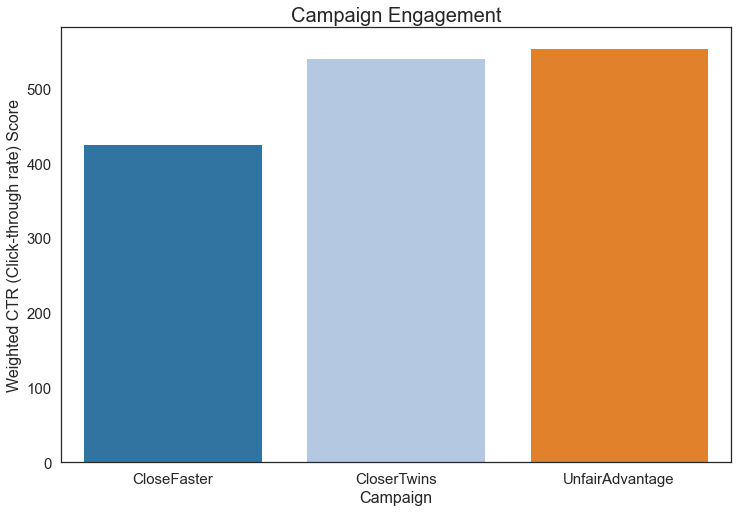

In [475]:
sns.barplot(data=df2_cwctr, x='Campaign_Name', y='Weighted_CTR_Score', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('Weighted CTR (Click-through rate) Score', fontsize=16)
plt.title('Campaign Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

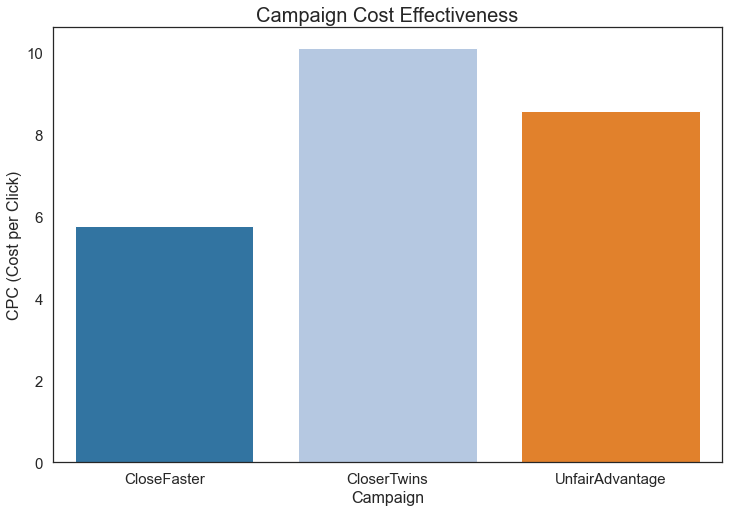

In [356]:
sns.barplot(data=df2_campaign, x='Campaign_Name', y='CPC', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [357]:
df2_platform = df2.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df2_platform['CPC'] = df2_platform['Spend'] / df2_platform['Clicks']
df2_platform['CTR'] = (df2_platform['Clicks'] / df2_platform['Impressions'])*100
df2_platform

,Platform,Clicks,Impressions,Spend,CPC,CTR
0,Domain Display,18115,19564371,133867.053908,7.389846,0.092592
1,LinkedIn,10456,3165406,160038.731038,15.305923,0.330321
2,User ID Display,10294,5998098,29331.148822,2.849344,0.171621


In [476]:
df2_pwctr = df2.groupby('Platform')[['Weighted_CTR_Score']].mean().reset_index()
df2_pwctr

,Platform,Weighted_CTR_Score
0,Domain Display,472.081523
1,LinkedIn,779.995855
2,User ID Display,600.417488


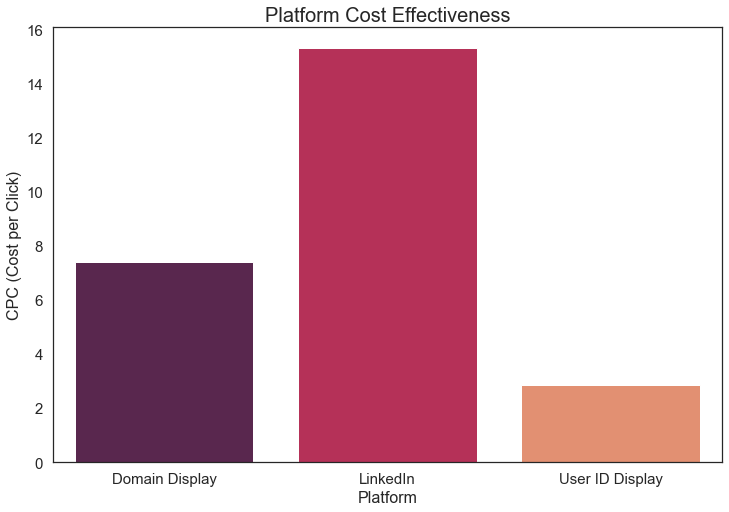

In [358]:
sns.barplot(data=df2_platform, x='Platform', y='CPC', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPC (Cost per Click)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

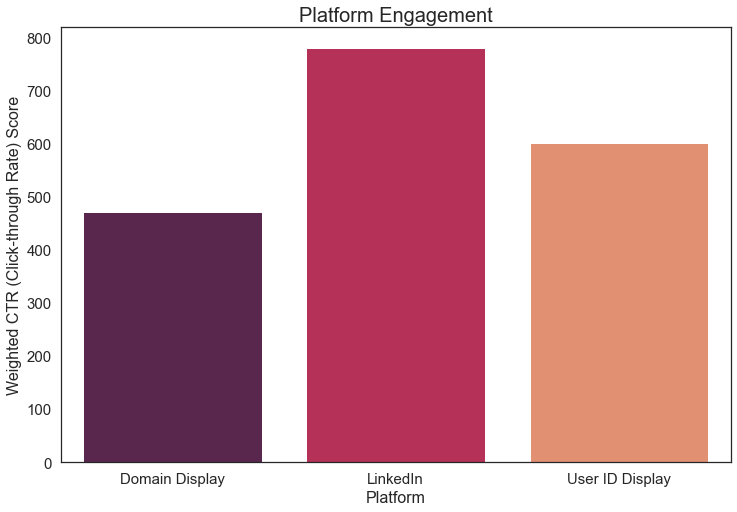

In [477]:
sns.barplot(data=df2_pwctr, x='Platform', y='Weighted_CTR_Score', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Weighted CTR (Click-through Rate) Score', fontsize=16)
plt.title('Platform Engagement', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [380]:
df2['CloseFaster_Domain'] = np.where((df2['Creative_Family']=='CloseFaster') & 
                                    (df2['Platform']=='Domain Display'), 
                                     df2['Spend'], 0)

df2['CloseFaster_LinkedIn'] = np.where((df2['Creative_Family']=='CloseFaster') & 
                                       (df2['Platform']=='LinkedIn'), 
                                       df2['Spend'], 0)

df2['CloseFaster_User'] = np.where((df2['Creative_Family']=='CloseFaster') & 
                                   (df2['Platform']=='User ID Display'), 
                                   df2['Spend'], 0)

df2['CloserTwins_Domain'] = np.where((df2['Creative_Family']=='CloserTwins') & 
                                     (df2['Platform']=='Domain Display'), 
                                     df2['Spend'], 0)

df2['CloserTwins_LinkedIn'] = np.where((df2['Creative_Family']=='CloserTwins') & 
                                       (df2['Platform']=='LinkedIn'), 
                                       df2['Spend'], 0)

df2['CloserTwins_User'] = np.where((df2['Creative_Family']=='CloserTwins') & 
                                   (df2['Platform']=='User ID Display'), 
                                   df2['Spend'], 0)

df2['Unfair_Domain'] = np.where((df2['Creative_Family']=='UnfairAdvantage') & 
                                (df2['Platform']=='Domain Display'), 
                                df2['Spend'], 0)

df2['Unfair_LinkedIn'] = np.where((df2['Creative_Family']=='UnfairAdvantage') & 
                                  (df2['Platform']=='LinkedIn'), 
                                  df2['Spend'], 0)

df2['Unfair_User'] = np.where((df2['Creative_Family']=='UnfairAdvantage') & 
                              (df2['Platform']=='User ID Display'), 
                              df2['Spend'], 0)

df2

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,...,Campaign_Name,CloseFaster_Domain,CloseFaster_LinkedIn,CloseFaster_User,CloserTwins_Domain,CloserTwins_LinkedIn,CloserTwins_User,Unfair_Domain,Unfair_LinkedIn,Unfair_User
501,4 - StackAdapt - Display - Image,Display,0,2022-04-23,366,93,4,Domain Display,CloseFaster,FasterAll,...,CloseFaster,1.770169,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
502,4 - StackAdapt - Audio,Audio,0,2022-04-25,366,129,4,Domain Display,CloserTwins,Cutdown1A,...,CloserTwins,0.000000,0.0,0.0,5.021292,0.0,0.0,0.000000,0.000000,0.0
506,4 - StackAdapt - Display - Interactive ads (al...,Display - Interactive,0,2022-07-15,366,53,4,Domain Display,CloserTwins,CloseMore,...,CloserTwins,0.000000,0.0,0.0,3.203899,0.0,0.0,0.000000,0.000000,0.0
522,5 - StackAdapt - Remarketing - Banner,Display,5,2022-05-08,4576,232,5,Domain Display,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,22.458325,0.000000,0.0
531,5 - StackAdapt - Remarketing - Banner,Display,0,2022-04-29,33,1,5,Domain Display,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.014483,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99653,Audience 4 - Carousel Ads,Carousel,79,2022-10-23,22212,0,4,LinkedIn,UnfairAdvantage,All,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,553.230000,0.0
99655,Audience 4 - Carousel Ads,Carousel,103,2022-10-24,38051,0,4,LinkedIn,UnfairAdvantage,All,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,836.277933,0.0
99656,Audience 5 - DSC,Single image,21,2022-10-24,1291,0,5,LinkedIn,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,289.039440,0.0
99659,Audience 5 - DSC,Single image,9,2022-10-19,680,0,5,LinkedIn,UnfairAdvantage,1099,...,UnfairAdvantage,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,138.223575,0.0


In [383]:
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')  

In [524]:
# Define the dependent variable.
y = df2['Weighted_CTR_Score']  

# Define the independent variable.
X = df2[['CloseFaster_Domain', 'CloseFaster_LinkedIn', 'CloseFaster_User', 
        'CloserTwins_Domain', 'CloserTwins_LinkedIn', 'CloserTwins_User', 
        'Unfair_Domain', 'Unfair_LinkedIn', 'Unfair_User']] 

In [525]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [526]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 335.04137947,  305.49802727,  221.90888089, ..., 4221.92706397,
       2057.89560034, 8641.51872655])

In [527]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.7000026073038843
Intercept:  74.54879833429322
Coefficients:


[('CloseFaster_Domain', 147.15689921996037),
 ('CloseFaster_LinkedIn', 9.272331409133109),
 ('CloseFaster_User', 122.5087389257989),
 ('CloserTwins_Domain', 45.99398500109067),
 ('CloserTwins_LinkedIn', 20.675968904017353),
 ('CloserTwins_User', 117.20837886935679),
 ('Unfair_Domain', 106.38799652385256),
 ('Unfair_LinkedIn', 14.348831635901881),
 ('Unfair_User', 111.04062885792743)]

In [528]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [529]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:     Weighted_CTR_Score   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     6839.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:57:52   Log-Likelihood:            -2.2551e+05
No. Observations:               27930   AIC:                         4.510e+05
Df Residuals:                   27920   BIC:                         4.511e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   77.8520 

In [530]:
tg2 = [['CloseFaster Domain Display', 132.5648], 
       ['CloseFaster LinkedIn', 9.2520], 
       ['CloseFaster User ID Display', 122.4320],
       ['CloserTwins Domain Display', 47.0905], 
       ['CloserTwins LinkedIn', 20.3957], 
       ['CloserTwins User ID Display', 120.1391], 
       ['UnfairAdvantage Domain Display', 106.9718], 
       ['UnfairAdvantage LinkedIn', 14.3099], 
       ['UnfairAdvantage User ID Display', 110.6855]]
  
# Create the pandas DataFrame
tg2summary = pd.DataFrame(tg2, columns=['Campaign / Platform', 'Coefficient'])
tg2summary

,Campaign / Platform,Coefficient
0,CloseFaster Domain Display,132.5648
1,CloseFaster LinkedIn,9.2520
2,CloseFaster User ID Display,122.4320
3,CloserTwins Domain Display,47.0905
4,CloserTwins LinkedIn,20.3957
5,CloserTwins User ID Display,120.1391
6,UnfairAdvantage Domain Display,106.9718
7,UnfairAdvantage LinkedIn,14.3099
8,UnfairAdvantage User ID Display,110.6855


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'CloseFaster Domain Display'),
  Text(1, 0, 'CloseFaster LinkedIn'),
  Text(2, 0, 'CloseFaster User ID Display'),
  Text(3, 0, 'CloserTwins Domain Display'),
  Text(4, 0, 'CloserTwins LinkedIn'),
  Text(5, 0, 'CloserTwins User ID Display'),
  Text(6, 0, 'UnfairAdvantage Domain Display'),
  Text(7, 0, 'UnfairAdvantage LinkedIn'),
  Text(8, 0, 'UnfairAdvantage User ID Display')])

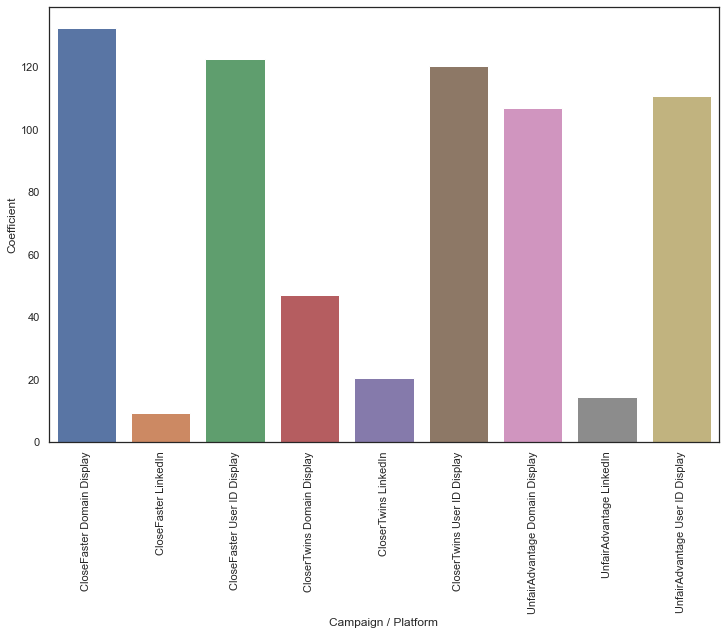

In [531]:
sns.barplot(data=tg2summary, x='Campaign / Platform', y='Coefficient')
plt.xticks(rotation=90)

In [532]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [533]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [5166.74338334  104.14139006 1675.93265503 ...  179.3122306   121.59037758
  307.22088982]


In [534]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [403.00948677 102.46605997  86.44291495 ...  96.98746925  90.22338826
 202.7326086 ]


In [535]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

76.30398243018189


In [536]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor              features
0        1.21                 const
1        1.00    CloseFaster_Domain
2        1.00  CloseFaster_LinkedIn
3        1.00      CloseFaster_User
4        1.01    CloserTwins_Domain
5        1.00  CloserTwins_LinkedIn
6        1.00      CloserTwins_User
7        1.01         Unfair_Domain
8        1.00       Unfair_LinkedIn
9        1.00           Unfair_User


In [540]:
df2[['Weighted_CTR_Score', 'Spend']].sum()

Weighted_CTR_Score    1.834640e+07
Spend                 3.232369e+05
dtype: float64

In [539]:
# Create variables
New_CFD = 107745
New_CFL = 0
New_CFU = 107745
New_CTD = 0
New_CTL = 0
New_CTU = 107745
New_UD = 0
New_UL = 0
New_UU = 0

# Print the predicted value. 
mlr.predict([[New_CFD, New_CFL, New_CFU, New_CTD, New_CTL, New_CTU, 
             New_UD, New_UL, New_UU]])

array([40419099.47098812])

In [310]:
df3

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.005076,0.0,0.0,0.00,3,Other
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.000527,0.0,0.0,0.00,3,Other
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.007299,0.0,0.0,0.00,3,Other
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,0,0,0,0.000000,0.0,0.0,0.00,3,Other
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,0,0,0,0.000000,0.0,0.0,0.00,3,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3,CloserTwins
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3,CloserTwins
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3,CloserTwins
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3,CloserTwins


In [434]:
df3.loc[df3['Platform']== 'Trade Media', 'Campaign_Name'] = 'CloserTwins'
df3[df3['Platform']=='Trade Media']

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,...,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name,Impressions_000s,CloserTwins_OTT,CloserTwins_Trade,CO_Domain,SEM,CO_LinkedIn
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.0,3,CloserTwins,0.197,0.0,0.0,0.0,0.0,0.0
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.0,3,CloserTwins,1.897,0.0,0.0,0.0,0.0,0.0
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.0,3,CloserTwins,0.137,0.0,0.0,0.0,0.0,0.0
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,...,0.0,0.0,3,CloserTwins,0.019,0.0,0.0,0.0,0.0,0.0
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,...,0.0,0.0,3,CloserTwins,0.145,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75162,Housing Wire,Display,0,2022-10-26,534,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.534,0.0,0.0,0.0,0.0,0.0
75163,Housing Wire,Display,0,2022-10-27,427,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.427,0.0,0.0,0.0,0.0,0.0
75164,Housing Wire,Display,0,2022-10-28,265,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.265,0.0,0.0,0.0,0.0,0.0
75165,Housing Wire,Display,0,2022-10-29,26,0,General Targetting,Trade Media,CloserTwins,Digital,...,0.0,0.0,3,CloserTwins,0.026,0.0,0.0,0.0,0.0,0.0


In [436]:
df3_campaign = df3.groupby('Campaign_Name')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df3_campaign['CPM'] = df3_campaign['Spend'] / (df3_campaign['Impressions'] / 1000)
df3_campaign['CTR'] = (df3_campaign['Clicks'] / df3_campaign['Impressions'])*100
df3_campaign.drop(df3_campaign[df3_campaign['Campaign_Name'] == 'Other'].index, 
                 inplace = True)
df3_campaign

,Campaign_Name,Clicks,Impressions,Spend,CPM,CTR
0,CloserTwins,445,7914295,260633.910008,32.932044,0.005623
1,CompetitiveOpportunity,373,276361,3261.037592,11.799920,0.134968
3,SEM Ads,12429,66693,8674.350000,130.063875,18.636139


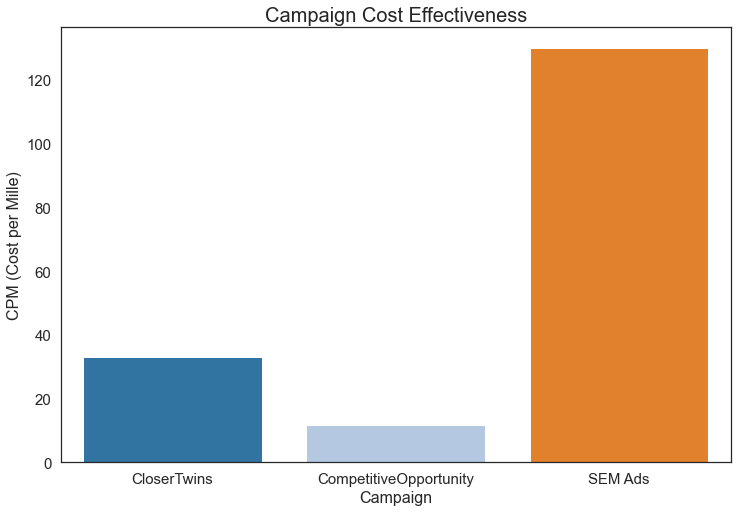

In [437]:
sns.barplot(data=df3_campaign, x='Campaign_Name', y='CPM', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('CPM (Cost per Mille)', fontsize=16)
plt.title('Campaign Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

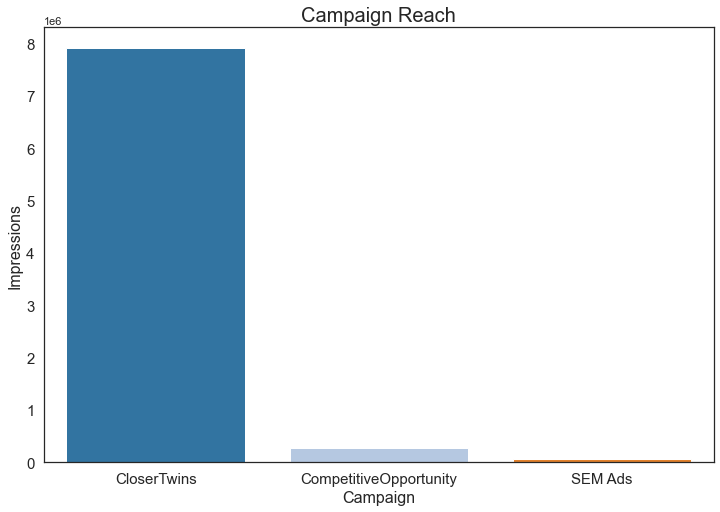

In [438]:
sns.barplot(data=df3_campaign, x='Campaign_Name', y='Impressions', palette = 'tab20')
plt.xlabel('Campaign',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('Campaign Reach', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [368]:
df3_platform = df3.groupby('Platform')[['Clicks', 'Impressions', 'Spend']].sum().reset_index()
df3_platform['CPM'] = df3_platform['Spend'] / (df3_platform['Impressions'] / 1000)
df3_platform['CTR'] = (df3_platform['Clicks'] / df3_platform['Impressions']) * 100
df3_platform

,Platform,Clicks,Impressions,Spend,CPM,CTR
0,Domain Display,263,262110,1275.127592,4.864857,0.100340
1,Google SEM,12429,66693,8674.350000,130.063875,18.636139
2,LinkedIn,1024,1347888,12390.641315,9.192634,0.075971
3,OTT,0,7348177,249833.910000,33.999441,0.000000
4,Trade Media,445,566118,10800.000008,19.077295,0.078606


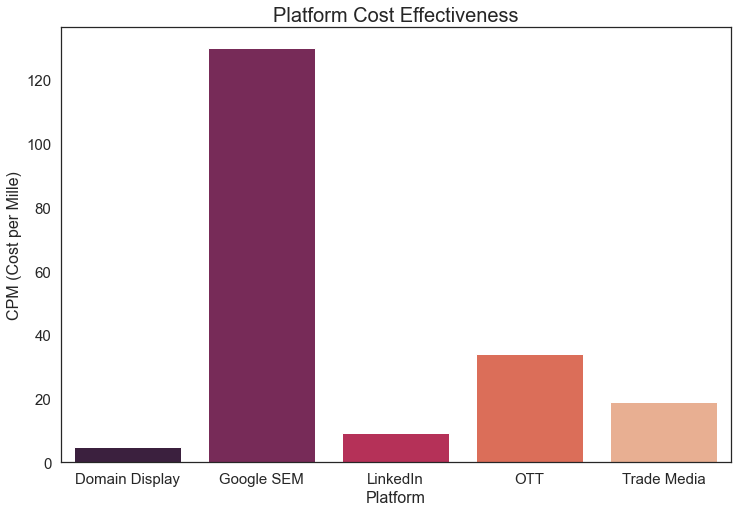

In [365]:
sns.barplot(data=df3_platform, x='Platform', y='CPM', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('CPM (Cost per Mille)', fontsize=16)
plt.title('Platform Cost Effectiveness', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

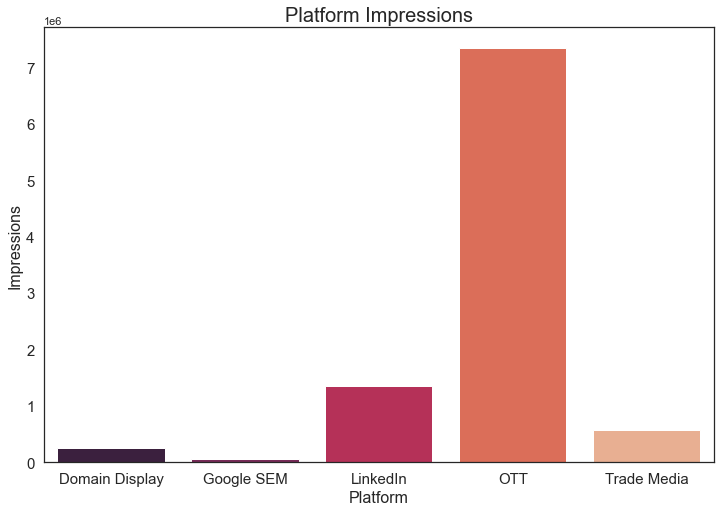

In [367]:
sns.barplot(data=df3_platform, x='Platform', y='Impressions', palette = 'rocket')
plt.xlabel('Platform',fontsize = 16)
plt.ylabel('Impressions', fontsize=16)
plt.title('Platform Impressions', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [412]:
df3['CloserTwins_OTT'] = np.where((df3['Creative_Family']=='CloserTwins') & 
                                  (df3['Platform']=='OTT'), 
                                  df3['Spend'], 0)

df3['CloserTwins_Trade'] = np.where(df3['Platform']=='Trade Media', 
                                    df3['Spend'], 0)

df3['CO_Domain'] = np.where((df3['Creative_Family']=='CompetitiveOpportunity') & 
                            (df3['Platform']=='Domain Display'), 
                            df3['Spend'], 0)

df3['CO_LinkedIn'] = np.where((df3['Creative_Family']=='CompetitiveOpportunity') & 
                              (df3['Platform']=='LinkedIn'), 
                              df3['Spend'], 0)

df3['SEM'] = np.where((df3['Creative_Family']=='SEM Ads') & 
                      (df3['Platform']=='Google SEM'), 
                      df3['Spend'], 0)

df3

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,...,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name,Impressions_000s,CloserTwins_OTT,CloserTwins_Trade,CO_Domain,SEM,CO_LinkedIn
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.00,3,Other,0.197,0.00,0.0,0.0,0.0,0.0
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.00,3,Other,1.897,0.00,0.0,0.0,0.0,0.0
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,...,0.0,0.00,3,Other,0.137,0.00,0.0,0.0,0.0,0.0
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,...,0.0,0.00,3,Other,0.019,0.00,0.0,0.0,0.0,0.0
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,...,0.0,0.00,3,Other,0.145,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,...,0.0,0.10,3,CloserTwins,0.003,0.10,0.0,0.0,0.0,0.0
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,...,0.0,0.17,3,CloserTwins,0.005,0.17,0.0,0.0,0.0,0.0
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,...,0.0,0.14,3,CloserTwins,0.004,0.14,0.0,0.0,0.0,0.0
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,...,0.0,0.58,3,CloserTwins,0.017,0.58,0.0,0.0,0.0,0.0


In [554]:
# Define the dependent variable.
y = df3['Reach']  

# Define the independent variable.
X = df3[['CloserTwins_OTT', 'CloserTwins_Trade', 'CO_Domain', 
         'SEM', 'CO_LinkedIn']] 

In [555]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [556]:
# Call the predictions for X (array).
mlr.predict(X) 

array([ 80.5854852 ,  80.5854852 ,  80.5854852 , ...,  82.84684008,
        89.9539554 , 195.91458383])

In [557]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8172781099464379
Intercept:  80.58548520297202
Coefficients:


[('CloserTwins_OTT', 16.152534822267718),
 ('CloserTwins_Trade', -0.10925303627546683),
 ('CO_Domain', 26.79232919038952),
 ('SEM', -10.514269757514821),
 ('CO_LinkedIn', 7.3985803562093055)]

In [558]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [559]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:                  Reach   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 1.649e+04
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:11:08   Log-Likelihood:            -1.2722e+05
No. Observations:               17344   AIC:                         2.545e+05
Df Residuals:                   17338   BIC:                         2.545e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                76.9203      2.98

In [560]:
tg3 = [['CloserTwins OTT', 16.4712], 
       ['CloserTwins Trade Media', -0.0997], 
       ['CompetitiveOpportunity Domain Display', 26.4481],
       ['CompetitiveOpportunity LinkedIn', 7.6131], 
       ['SEM', -9.8658]]
  
# Create the pandas DataFrame
tg3summary = pd.DataFrame(tg3, columns=['Campaign / Platform', 'Coefficient'])
tg3summary

,Campaign / Platform,Coefficient
0,CloserTwins OTT,16.4712
1,CloserTwins Trade Media,-0.0997
2,CompetitiveOpportunity Domain Display,26.4481
3,CompetitiveOpportunity LinkedIn,7.6131
4,SEM,-9.8658


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CloserTwins OTT'),
  Text(1, 0, 'CloserTwins Trade Media'),
  Text(2, 0, 'CompetitiveOpportunity Domain Display'),
  Text(3, 0, 'CompetitiveOpportunity LinkedIn'),
  Text(4, 0, 'SEM')])

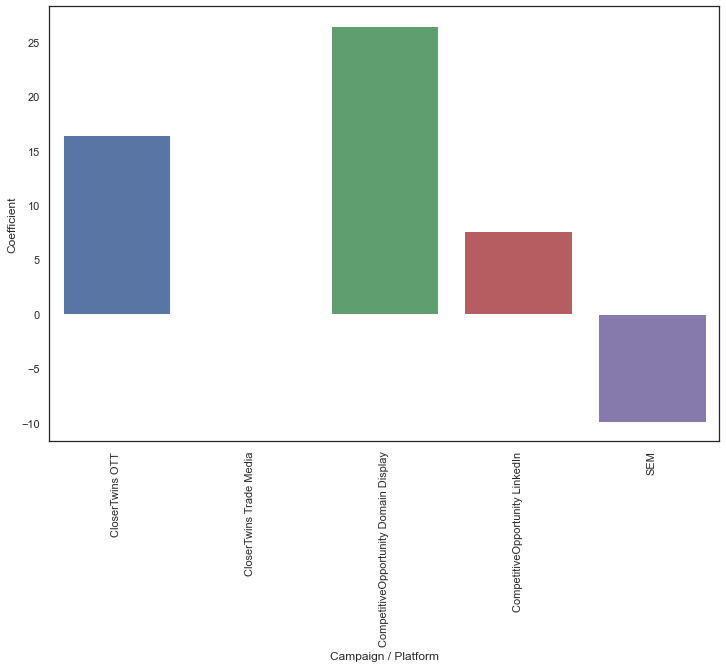

In [561]:
sns.barplot(data=tg3summary, x='Campaign / Platform', y='Coefficient')
plt.xticks(rotation=90)

In [562]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)  

LinearRegression()

In [563]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [ 47.61894714  79.72042972 590.98679724 ...  92.07383744  77.41446028
  76.92032397]


In [564]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 233.72624597  358.57802    1141.45464526 ...    9.53702304  229.27901919
   88.12074697]


In [565]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

78.2835264659154


In [566]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor           features
0        1.12              const
1        1.00    CloserTwins_OTT
2        1.00  CloserTwins_Trade
3        1.00          CO_Domain
4        1.00                SEM
5        1.00        CO_LinkedIn


In [567]:
df3[['Reach', 'Spend']].sum()

Reach    5.739097e+06
Spend    2.829740e+05
dtype: float64

In [569]:
# Create variables
New_CTO = 141487
New_CTT = 0
New_COD = 141487
New_SEM = 0
New_COL = 0

# Print the predicted value. 
mlr.predict([[New_CTO, New_CTT, New_COD, New_SEM, New_COL]])

array([6072594.80263742])

<AxesSubplot:xlabel='Spend', ylabel='Weighted_CTR_Score'>

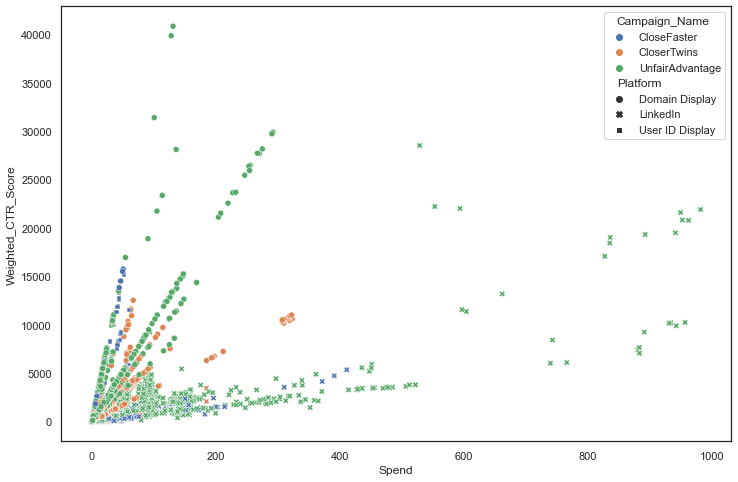

In [570]:
sns.scatterplot(data=df2[df2['Campaign_Name']!='Other'], x='Spend', y='Weighted_CTR_Score', 
               hue='Campaign_Name', style='Platform')

<AxesSubplot:xlabel='Spend', ylabel='Reach'>

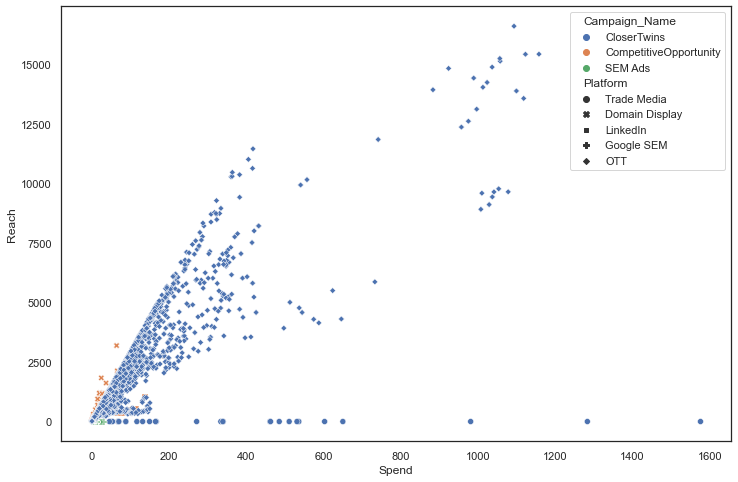

In [571]:
sns.scatterplot(data=df3[df3['Campaign_Name']!='Other'], x='Spend', y='Reach', 
               hue='Campaign_Name', style='Platform')

In [323]:
df3['Impressions_000s'] = df3['Impressions'] / 1000
df3

,Campaign,Ad_Format,Clicks,Date,Impressions,Reach,Audience,Platform,Creative_Family,Creative_Version,100%_Video_Views,Video_Starts,Follows,CTR,CTR_Score,Weighted_CTR_Score,Spend,Target_Group,Campaign_Name,Impressions_000s
8566,Housing Wire,Display,1,2022-09-04,197,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.005076,0.0,0.0,0.00,3,Other,0.197
8732,Housing Wire,Display,1,2022-09-04,1897,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.000527,0.0,0.0,0.00,3,Other,1.897
9096,Housing Wire,Display,1,2022-09-04,137,0,General Targetting,Trade Media,No Answer,No Answer,0,0,0,0.007299,0.0,0.0,0.00,3,Other,0.137
9132,Housing Wire,Display,0,2022-09-04,19,0,General Targetting,Trade Media,No Answer,1099,0,0,0,0.000000,0.0,0.0,0.00,3,Other,0.019
9268,Housing Wire,Display,0,2022-09-04,145,0,General Targetting,Trade Media,No Answer,NoDTI,0,0,0,0.000000,0.0,0.0,0.00,3,Other,0.145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102063,ESPN,TV,0,2022-05-01,3,3,General Targetting,OTT,CloserTwins,15s,0,0,0,0.000000,0.0,0.0,0.10,3,CloserTwins,0.003
102064,MTV,TV,0,2022-05-01,5,5,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.17,3,CloserTwins,0.005
102065,Food Network,TV,0,2022-05-01,4,4,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.14,3,CloserTwins,0.004
102066,Nat Geo TV,TV,0,2022-05-01,17,16,General Targetting,OTT,CloserTwins,15_QR,0,0,0,0.000000,0.0,0.0,0.58,3,CloserTwins,0.017


In [375]:
df.to_csv('Creative_Cleaned.csv', index = False)

In [214]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [ ]:
# df['dates'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# https://datatofish.com/strings-to-datetime-pandas/
#https://datatofish.com/strings-to-datetime-pandas/#:~:text=df%5B%27dates%27%5D%20%3D%20pd.to_datetime(df%5B%27dates%27%5D%2C%20format%3D%27%25d%2D%25b%2D%25Y%27)

In [ ]:
# https://stackoverflow.com/questions/34866856/how-to-replace-all-values-in-a-pandas-dataframe-not-in-a-list